# A.I. Assignment 3


## Learning Goals

By the end of this lab, you should be able to:
* Perform some more data preproscessing: checking for missing samples, eliminate them, encoding labeled classes
* Feel comfortable creating a simple decision tree for a classification 
* Dealing with some feature selection techniques

### Content:

The Lab. has 3 sections: 

1. Preprocessing
2. Constructing and fitting a decision tree
3. Perform a feature selection based on the linear correlation between the dataset's features 

There are some exercises, put your answer code in the cells with the *# your code here*. 

All the work must be done during the lab and uploaded on teams by the end of the lab. 

If there are any python libraries missing, please install them on your working environment. 

We will be using a variation of the famous **Iris dataset**. !DO NOT USE OTHER VERSION THAN THE ONE PROVIDED HERE.  

This set contains measurements of various parts of three different species of iris flowers. The goal is to use these measurements to predict the species of an iris flower.

The dataset contains 154 instances, each with 4 features: *sepal length*, *sepal width*, *petal length*, and *petal width*. The target variable is the species of the iris flower, which can be one of three possible values: *setosa*, *versicolor*, or *virginica*.

We will start by loading the dataset, preparing it and splitting it into training and testing sets.

In [1]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 


## Preparing the data

### Exercises

1. Import with pandas the file *iris_teach_2.csv* into the pandas DataFrame with the name *df_iris*. 

In [2]:
# your code here

df_iris = pd.read_csv('iris_teach_2.csv')
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


___________________________________________________________________________________________________________________________

2. use the method *isnull()* from the class DataFrame to check if there are empty cells in the dataset. (Hint: check the documentation and use this method with respect to your DataFrame object; use the method .sum() to the result to count the empty cells on columns)

In [3]:
# your code here

# .isnull() returns a new dataframe with the same size
# each element is either True/False, true if element is null
# false otherwise
# 

df_iris_null = df_iris.isnull()

for column in df_iris_null:
    values = df_iris_null[column]
    print(column, values.sum())

sepal length (cm) 1
sepal width (cm) 1
petal length (cm) 0
petal width (cm) 1
iris_name 1


3. We see that we have some empty cells on some rows. Delete these rows (hint: use the method *dropna()* from pandas.DataFrame class, with the argument *inplace=True*). Check the documentation why we use that argument (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)! 

In [4]:
# your code here

# .dropna() removes rows that contains at least one nan value
# inplace=True specifies that we want to modify the current dataframe and 
# not to create a new one

df_iris.dropna(inplace=True)

for column in df_iris.isnull():
    values = df_iris.isnull()[column]
    print(column, values.sum())

sepal length (cm) 0
sepal width (cm) 0
petal length (cm) 0
petal width (cm) 0
iris_name 0


4. Divide the dataset in two parts: a set **X** for features and **y** for target. 

In [5]:
# your code here

# df.columns => list of columns names of df
# df.columns.difference(columns to except as list) => list of all the columns except those
# provided as arguments to difference

import numpy as np

X = np.array(df_iris[df_iris.columns.difference(['iris_name'])])
y = np.array(df_iris['iris_name'])

X, y

(array([[1.4, 0.2, 5.1, 3.5],
        [1.4, 0.2, 4.9, 3. ],
        [1.3, 0.2, 4.7, 3.2],
        [1.5, 0.2, 4.6, 3.1],
        [1.4, 0.2, 5. , 3.6],
        [1.7, 0.4, 5.4, 3.9],
        [1.4, 0.3, 4.6, 3.4],
        [1.5, 0.2, 5. , 3.4],
        [1.4, 0.2, 4.4, 2.9],
        [1.5, 0.1, 4.9, 3.1],
        [1.5, 0.2, 5.4, 3.7],
        [1.6, 0.2, 4.8, 3.4],
        [1.4, 0.1, 4.8, 3. ],
        [1.1, 0.1, 4.3, 3. ],
        [1.2, 0.2, 5.8, 4. ],
        [1.5, 0.4, 5.7, 4.4],
        [1.3, 0.4, 5.4, 3.9],
        [1.4, 0.3, 5.1, 3.5],
        [1.7, 0.3, 5.7, 3.8],
        [1.5, 0.3, 5.1, 3.8],
        [1.7, 0.2, 5.4, 3.4],
        [1.5, 0.4, 5.1, 3.7],
        [1. , 0.2, 4.6, 3.6],
        [1.7, 0.5, 5.1, 3.3],
        [1.9, 0.2, 4.8, 3.4],
        [1.6, 0.2, 5. , 3. ],
        [1.6, 0.4, 5. , 3.4],
        [1.5, 0.2, 5.2, 3.5],
        [1.4, 0.2, 5.2, 3.4],
        [1.6, 0.2, 4.7, 3.2],
        [1.6, 0.2, 4.8, 3.1],
        [1.5, 0.4, 5.4, 3.4],
        [1.5, 0.1, 5.2, 4.1],
        [1

5. Create a **LabelEncoder** object to encode the classes from the target. Fit it with the *y* list, and encode *y* with it. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

In [6]:
# your code here

from sklearn.preprocessing import LabelEncoder

# LabelEncoder:
# .fit(y) => Fit label encoder and return encoded labels.
# basically encodes the strings to numbers

# .transform(y) => Transform labels to normalized encoding.
# basically each value for y is encoded using the encoding 
# done when .fit()

label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

6. Divide the dataset in a training and a testing set as we did it in the previous laboratory with the sklearn function *train_test_split*. Check the documentation why we use for *random_state* a fixed value here! (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [7]:
# your code here

from sklearn.model_selection import train_test_split

# for train_test_split =>
# arrays we want to split 
# test_size - float => percentage on how many data should be in the test
#           - int => number of test samples
# random_state => controls the shuffling of data
# if we use a constant value we obtain predictable results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [39]:
X_train

array([[5.5, 2.1, 6.8, 3. ],
       [4.8, 1.8, 6. , 3. ],
       [1.7, 0.5, 5.1, 3.3],
       [4.1, 1. , 5.8, 2.7],
       [3.5, 1. , 5.7, 2.6],
       [3.9, 1.2, 5.8, 2.7],
       [4.8, 1.4, 6.8, 2.8],
       [1.4, 0.3, 4.8, 3. ],
       [6.1, 2.5, 7.2, 3.6],
       [1.5, 0.2, 5. , 3.4],
       [1.4, 0.3, 5.1, 3.5],
       [6. , 2.5, 6.3, 3.3],
       [4.7, 1.5, 6.7, 3.1],
       [1.9, 0.4, 5.1, 3.8],
       [5.6, 1.8, 6.3, 2.9],
       [4.5, 1.5, 6.2, 2.2],
       [1.4, 0.3, 4.6, 3.4],
       [3.9, 1.1, 5.6, 2.5],
       [1.2, 0.2, 5. , 3.2],
       [6.1, 1.9, 7.4, 2.8],
       [4.8, 1.8, 5.9, 3.2],
       [4.5, 1.5, 6.4, 3.2],
       [1.5, 0.2, 5.4, 3.7],
       [4. , 1.3, 5.5, 2.3],
       [5.1, 1.5, 6.3, 2.8],
       [5.6, 2.4, 6.3, 3.4],
       [5.1, 2. , 6.5, 3.2],
       [5.6, 2.4, 6.7, 3.1],
       [3.8, 1.1, 5.5, 2.4],
       [1.5, 0.4, 5.1, 3.7],
       [5.6, 1.4, 6.1, 2.6],
       [1.3, 0.2, 4.4, 3. ],
       [1.3, 0.2, 4.7, 3.2],
       [4.5, 1.5, 5.4, 3. ],
       [5.5, 1

## Building the Model

We can now build the decision tree model using scikit-learn's **DecisionTreeClassifier class**:


In [8]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Evaluating the Model

We can evaluate the performance of the model on the test set using scikit-learn's *accuracy_score* function:

In [9]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


## Visualizing the Model

We can visualize the decision tree using scikit-learn's *plot_tree* function:


[Text(0.5, 0.9166666666666666, 'X[0] <= 2.6\nentropy = 1.583\nsamples = 120\nvalue = [37, 41, 42]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 83\nvalue = [0, 41, 42]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[0] <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[1] <= 1.65\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[1] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156

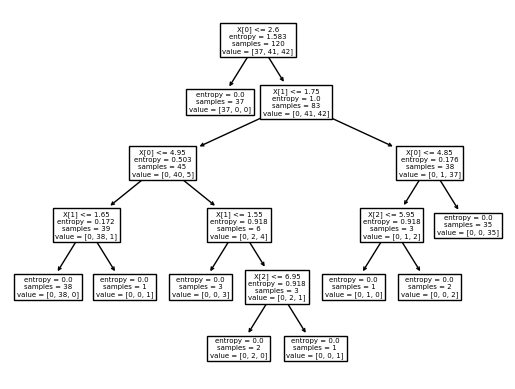

In [10]:
# Visualize the decision tree 
plot_tree(tree_clf)

Import with pip the package <a href="https://pypi.org/project/dtreeviz/">dtreeviz</a> to visualise nicely the tree.

In [30]:
from dtreeviz import dtreeviz

features = df_iris.drop('iris_name', axis=1)
target = df_iris['iris_name']

viz = dtreeviz(tree_clf, 
               features,
               target,
               target_name='iris_name',
               feature_names=features.columns, 
               class_names=["setosa", "versicolor", "virginica"],
               scale=2,
               orientation='LR'
               )
viz

C:\Users\narci\AppData\Local\Temp\ipykernel_12960\3975692858.py:6: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

### Tuning the Model

We can tune the hyperparameters of the decision tree model to improve its performance. 

One important hyperparameter is the maximum depth of the tree. 

We can use scikit-learn's GridSearchCV function to search over different values of the maximum depth and find the best one:

In [31]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3}


We can now create a new decision tree classifier object with the best hyperparameters and fit it to the training data:


In [32]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.375, 0.875, 'X[0] <= 2.6\nentropy = 1.583\nsamples = 120\nvalue = [37, 41, 42]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 83\nvalue = [0, 41, 42]'),
 Text(0.25, 0.375, 'X[0] <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.125, 0.125, 'entropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[0] <= 4.85\nentropy = 0.176\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

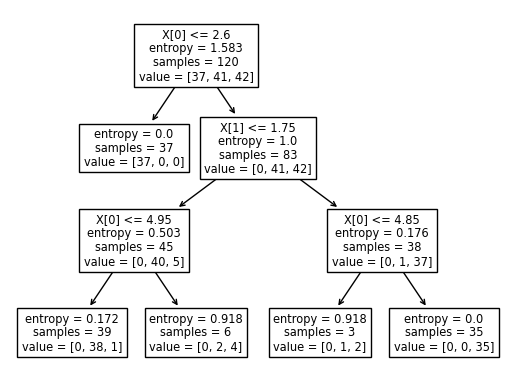

In [13]:
# Visualize the decision tree 
plot_tree(tree_clf_tuned)

<font color='brown' size = '14pt' face="Century Schoolbook"><b>Feature selection</b></font> 

In practice prior to constructing the decision tree, it may be beneficial to perform dimensionality reduction techniques such as a Feature selection. This can enhance the likelihood of the decision tree to identify discriminative features.

One way to do this is to examine the correlation between the variables in our dataset by plotting the Pearson Correlation among all attributes. We will use the full, clean dataset for this with the labels encoded. 

Recall: The *Pearson correlation coefficient (r)* is the most common way of measuring a linear correlation.

In [14]:
df_clean_iris_set = df_iris.copy()
df_clean_iris_set['iris_name']=y
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: title={'center': 'Pearson Correlation of Features'}>

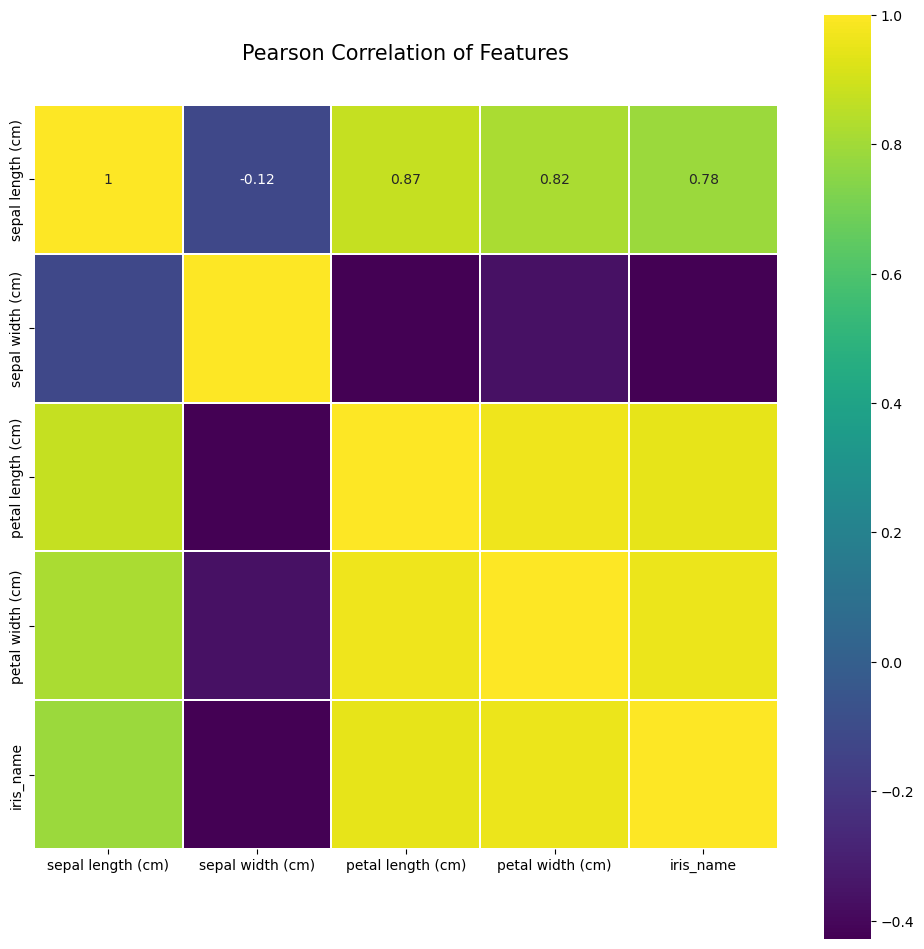

In [33]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Exercises

7. Drop the *petal width* column from the database and create a decision tree in a similar way with the example.

8. Find the proper depth and evaluate the score for the decision tree model that you build.

In [3]:
# your code here
import pandas as pd
import numpy as np

df_iris = pd.read_csv('iris_teach_2.csv')
df_iris.dropna(inplace=True)

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = np.array(df_iris[df_iris.columns.difference(['iris_name'])])
y = np.array(df_iris['iris_name']) 

X, y

(array([[1.4, 0.2, 5.1, 3.5],
        [1.4, 0.2, 4.9, 3. ],
        [1.3, 0.2, 4.7, 3.2],
        [1.5, 0.2, 4.6, 3.1],
        [1.4, 0.2, 5. , 3.6],
        [1.7, 0.4, 5.4, 3.9],
        [1.4, 0.3, 4.6, 3.4],
        [1.5, 0.2, 5. , 3.4],
        [1.4, 0.2, 4.4, 2.9],
        [1.5, 0.1, 4.9, 3.1],
        [1.5, 0.2, 5.4, 3.7],
        [1.6, 0.2, 4.8, 3.4],
        [1.4, 0.1, 4.8, 3. ],
        [1.1, 0.1, 4.3, 3. ],
        [1.2, 0.2, 5.8, 4. ],
        [1.5, 0.4, 5.7, 4.4],
        [1.3, 0.4, 5.4, 3.9],
        [1.4, 0.3, 5.1, 3.5],
        [1.7, 0.3, 5.7, 3.8],
        [1.5, 0.3, 5.1, 3.8],
        [1.7, 0.2, 5.4, 3.4],
        [1.5, 0.4, 5.1, 3.7],
        [1. , 0.2, 4.6, 3.6],
        [1.7, 0.5, 5.1, 3.3],
        [1.9, 0.2, 4.8, 3.4],
        [1.6, 0.2, 5. , 3. ],
        [1.6, 0.4, 5. , 3.4],
        [1.5, 0.2, 5.2, 3.5],
        [1.4, 0.2, 5.2, 3.4],
        [1.6, 0.2, 4.7, 3.2],
        [1.6, 0.2, 4.8, 3.1],
        [1.5, 0.4, 5.4, 3.4],
        [1.5, 0.1, 5.2, 4.1],
        [1

In [5]:
# encoding the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [8]:
# creating the tree
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=9)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=9)

In [10]:
# checking the accuracy
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree 

y_predictions = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)
print('Accuracy: {:.2f}'.format(accuracy)) 

Accuracy: 1.00


[Text(0.5, 0.9166666666666666, 'X[1] <= 0.75\nentropy = 1.583\nsamples = 120\nvalue = [37, 41, 42]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 83\nvalue = [0, 41, 42]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[0] <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[1] <= 1.65\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[1] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

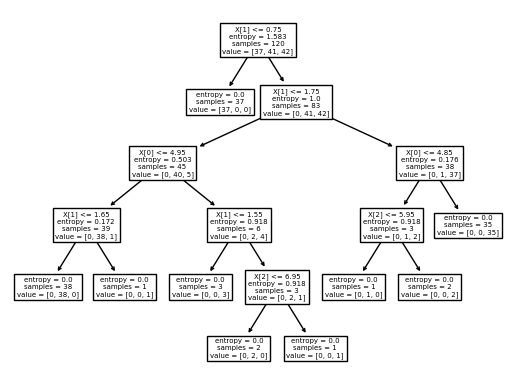

In [11]:
plot_tree(tree_classifier)

In [12]:
from sklearn.model_selection import GridSearchCV 

# finding best value for depth
param_grid = { 'max_depth': [1, 2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)

grid_search.fit(X_train, y_train)
print("Best value for max depth is: ", grid_search.best_params_)

Best value for max depth is:  {'max_depth': 3}


In [13]:
# creating tree classifier with depth = 3
tuned_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=9)
tuned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=9)

In [14]:
# testing the accuracy of tuned tree
y_predictions = tuned_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)

print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


[Text(0.375, 0.875, 'X[1] <= 0.75\nentropy = 1.583\nsamples = 120\nvalue = [37, 41, 42]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 83\nvalue = [0, 41, 42]'),
 Text(0.25, 0.375, 'X[0] <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.125, 0.125, 'entropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[0] <= 4.85\nentropy = 0.176\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

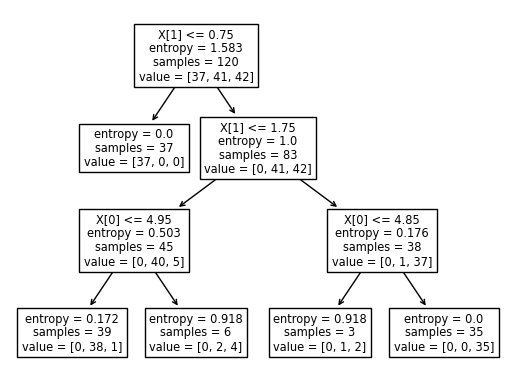

In [15]:
plot_tree(tuned_tree)